# Gun Incident ( EDA )

In [49]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/gdrive')

data = pd.read_csv('/content/gdrive/MyDrive/data/gun-violence-data_01-2013_03-2018.csv')
data.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_age,participant_age_group,participant_gender,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district
0,461105,2013-01-01,Pennsylvania,Mckeesport,1506 Versailles Avenue and Coursin Street,0,4,http://www.gunviolencearchive.org/incident/461105,http://www.post-gazette.com/local/south/2013/0...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||3::Male||4::Female,0::Julian Sims,NaN,0::Arrested||1::Injured||2::Injured||3::Injure...,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://pittsburgh.cbslocal.com/2013/01/01/4-pe...,NaN,NaN
1,460726,2013-01-01,California,Hawthorne,13500 block of Cerise Avenue,1,3,http://www.gunviolencearchive.org/incident/460726,http://www.dailybulletin.com/article/zz/201301...,False,...,0::20,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male,0::Bernard Gillis,NaN,0::Killed||1::Injured||2::Injured||3::Injured,0::Victim||1::Victim||2::Victim||3::Victim||4:...,http://losangeles.cbslocal.com/2013/01/01/man-...,62.0,35.0
2,478855,2013-01-01,Ohio,Lorain,1776 East 28th Street,1,3,http://www.gunviolencearchive.org/incident/478855,http://chronicle.northcoastnow.com/2013/02/14/...,False,...,0::25||1::31||2::33||3::34||4::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Male||1::Male||2::Male||3::Male||4::Male,0::Damien Bell||1::Desmen Noble||2::Herman Sea...,NaN,"0::Injured, Unharmed, Arrested||1::Unharmed, A...",0::Subject-Suspect||1::Subject-Suspect||2::Vic...,http://www.morningjournal.com/general-news/201...,56.0,13.0
3,478925,2013-01-05,Colorado,Aurora,16000 block of East Ithaca Place,4,0,http://www.gunviolencearchive.org/incident/478925,http://www.dailydemocrat.com/20130106/aurora-s...,False,...,0::29||1::33||2::56||3::33,0::Adult 18+||1::Adult 18+||2::Adult 18+||3::A...,0::Female||1::Male||2::Male||3::Male,0::Stacie Philbrook||1::Christopher Ratliffe||...,NaN,0::Killed||1::Killed||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://denver.cbslocal.com/2013/01/06/officer-...,40.0,28.0
4,478959,2013-01-07,North Carolina,Greensboro,307 Mourning Dove Terrace,2,2,http://www.gunviolencearchive.org/incident/478959,http://www.journalnow.com/news/local/article_d...,False,...,0::18||1::46||2::14||3::47,0::Adult 18+||1::Adult 18+||2::Teen 12-17||3::...,0::Female||1::Male||2::Male||3::Female,0::Danielle Imani Jameison||1::Maurice Eugene ...,3::Family,0::Injured||1::Injured||2::Killed||3::Killed,0::Victim||1::Victim||2::Victim||3::Subject-Su...,http://myfox8.com/2013/01/08/update-mother-sho...,62.0,27.0


# Individual Gun Incident (2013-2018) Data Dictionary

**participant_age** data appears to be useless

In [60]:
print(type(data))
print(list(data.columns))

print(f"data from {data.date.min()} to {data.date.max()}")

print(f"{len(data.state.unique())} states.")
print(f"{len(data.gun_type.unique())} incidents.")
print(f"{data['n_killed'].sum()} deaths.")

<class 'pandas.core.frame.DataFrame'>
['incident_id', 'date', 'state', 'city_or_county', 'address', 'n_killed', 'n_injured', 'incident_url', 'source_url', 'incident_url_fields_missing', 'congressional_district', 'gun_stolen', 'gun_type', 'incident_characteristics', 'latitude', 'location_description', 'longitude', 'n_guns_involved', 'notes', 'participant_age', 'participant_age_group', 'participant_gender', 'participant_name', 'participant_relationship', 'participant_status', 'participant_type', 'sources', 'state_house_district', 'state_senate_district']
data from 2013-01-01 to 2018-03-31
51 states.
2503 incidents.
60468 deaths.


0    40.3467
1    33.9090
2    41.4455
3    39.6518
4    36.1140
Name: latitude, dtype: float64


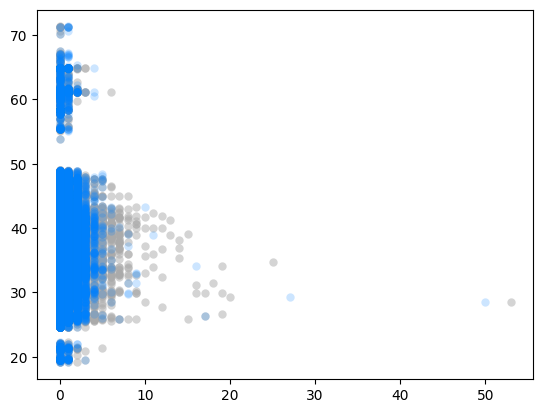

In [83]:
print(data.latitude.head())

plt.scatter(data.n_injured, data.latitude, alpha=0.5, lw=0, color="#aaaaaa")
plt.scatter(data.n_killed, data.latitude, alpha=0.2, lw=0, color="#0080ff")

    Rank            State  # of guns per capita # of guns registered
0      1          Wyoming                229.24              132,806
1      2  Washington D.C.                 68.05               47,228
2      3    New Hampshire                 46.76               64,135
3      4       New Mexico                 46.73               97,580
4      5         Virginia                 36.34              307,822
5      6          Alabama                 33.15              161,641
6      7            Idaho                 28.86               49,566
7      8         Arkansas                 26.57               79,841
8      9           Nevada                 25.64               76,888
9     10          Arizona                 25.61              179,738
10    11        Louisiana                 24.94              116,831
11    12     South Dakota                 24.29               21,130
12    13             Utah                 23.48               72,856
13    14      Connecticut         

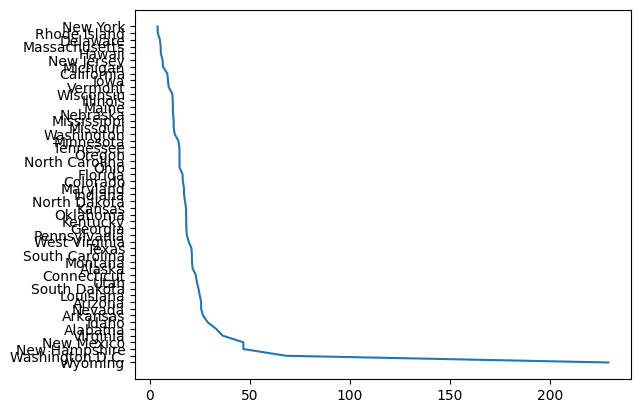

In [103]:
# calculate per capita data and plot versus latitude

gpc = pd.read_csv('/content/gdrive/MyDrive/data/raw-thoughtco-guns-per-capita-by-state.tsv', delimiter="\t")

print(gpc.head(20))

plt.plot(gpc['# of guns per capita'], gpc['State'])